## Student Performance Indicator

#### 1) Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

#### 2) Data Collection


Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977


The data consists of 8 column and 1000 rows.

#### 2.1 Import Data and Required Packages

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the csv data set as Pandas Dataframe

In [8]:
data = pd.read_csv("data/StudentsPerformance.csv")

#### Shape of dataframe

In [9]:
data.shape

(1000, 8)

In [10]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [11]:
print("Total number of students:", data.shape[0])
print("Total number of features:", data.shape[1])
print("List of all columns:\n", list(data.columns))

Total number of students: 1000
Total number of features: 8
List of all columns:
 ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


#### 2.2 Dataset information

1. gender : sex of students -> (Male/female)
2. race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
3. parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
4. lunch : having lunch before test (standard or free/reduced)
5. test preparation course : complete or not complete before test
6. math score
7. reading score
8. writing score

### 3. Data checks to perform

1. Check Missing data
2. Check duplicates
3. Check data types
4. Check number unique values of each columns
5. Check statistics of each column
6. Check various catergories present in each catergorical columns

#### 3.1 Check Missing Data

In [12]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in any columns

#### 3.2 Check Duplicates

In [13]:
data.duplicated().sum()

0

#### 3.3 Check data types

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values in each columns

In [15]:
print("Number of uniques values in each columns: ")
data.nunique()

Number of uniques values in each columns: 


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 3.5 Checking the statistics of the data

In [16]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Observations:
1. Means for each numerical data is between 66 - 68
2. Standard deviation is also close for all the columns that is between 14.6- 15.2
3. Mininmum value for math score is 0

#### 3.6 Exploring data

In [17]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [18]:
print("Catergories in Gender feature:", data['gender'].unique())
print("Categories in race/ethinicity:", data['race/ethnicity'].unique())


Catergories in Gender feature: ['female' 'male']
Categories in race/ethinicity: ['group B' 'group C' 'group A' 'group D' 'group E']


In [19]:
columns = list(data.columns)

#### Defining numerical and categorical features

In [20]:
numerical_features = [features for features in data.columns if data[features].dtype != "O"]
categorical_features = [features for features in data.columns if data[features].dtype == 'O']

print(f"We have {len(numerical_features)} numerical features : {numerical_features}")
print(f"We have {len(categorical_features)} Categorical features: {categorical_features}")

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 Categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [21]:
for i in range(len(categorical_features)):
    print(f"Categoris in {columns[i]} feature: {data[columns[i]].unique()}")

Categoris in gender feature: ['female' 'male']
Categoris in race/ethnicity feature: ['group B' 'group C' 'group A' 'group D' 'group E']
Categoris in parental level of education feature: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categoris in lunch feature: ['standard' 'free/reduced']
Categoris in test preparation course feature: ['none' 'completed']


#### 3.8 Adding columns of Total score and mean score

In [22]:
data['total score'] = data[numerical_features].sum(axis =1)
data['average'] = data[numerical_features].sum(axis = 1)/3

In [23]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


#### 3.9 Students with full marks in all subjects

In [24]:
math_full = data[data['math score'] == 100]['math score'].count()
reading_full = data[data['reading score'] == 100]['reading score'].count()
writing_full = data[data['writing score'] == 100]['writing score'].count()

print("Number of students with full marks in maths:", math_full)
print('Number of students with full marks in reading:', reading_full)
print("Number of students with full marks in writing:", writing_full)

Number of students with full marks in maths: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


#### 3.10 Students with marks less than 20 in all subjects

In [25]:
math_less_20 = data[data['math score'] < 20]['math score'].count()
reading_less_20 = data[data['reading score'] < 20]['reading score'].count()
writing_less_20 = data[data['writing score'] < 20]['writing score'].count()

print("Number of studens with maths marks less than 20:", math_less_20)
print("Number of students with reading marks less than 20:", reading_less_20)
print("Number of students with writing marks less than 20:", writing_less_20)

Number of studens with maths marks less than 20: 4
Number of students with reading marks less than 20: 1
Number of students with writing marks less than 20: 3


#### Observation:
1. There are very less students who have score less than 20

### 4 Exploring data(Visualization)

In [26]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [27]:
import seaborn as sns

Text(0.5, 1.0, 'Average value of male and female students')

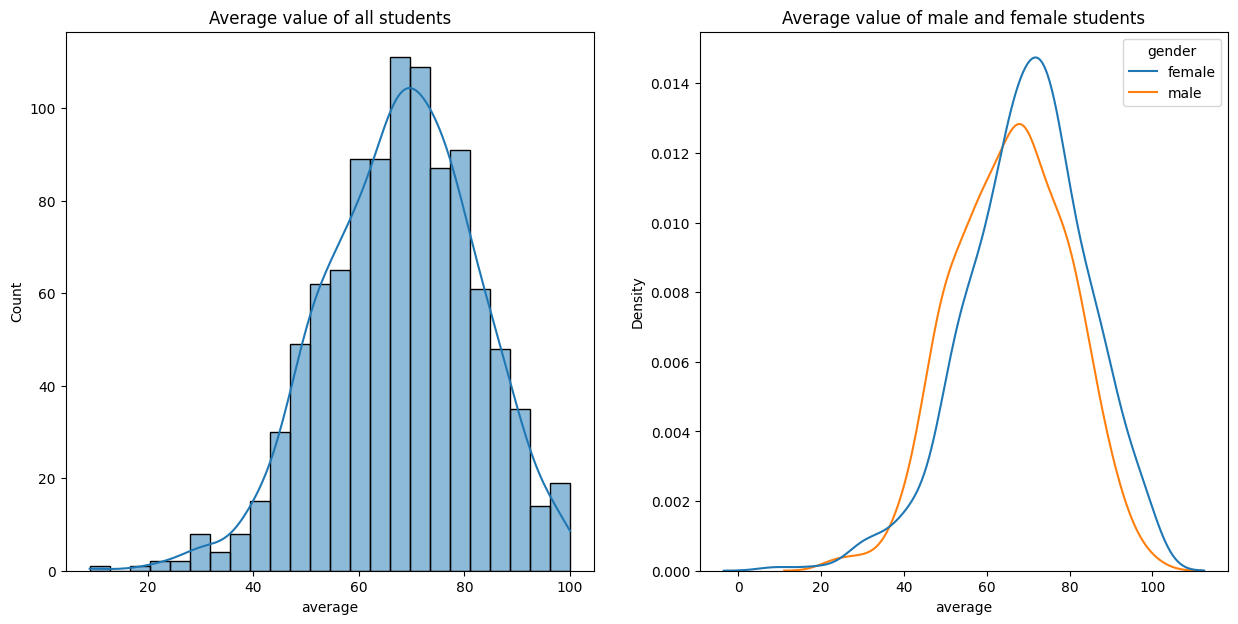

In [28]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.histplot(data = data, x = 'average', kde=True)
plt.title("Average value of all students")
plt.subplot(122)
sns.kdeplot(data = data, x = 'average', hue='gender')
plt.title("Average value of male and female students")

Text(0.5, 1.0, 'Total score of femal and male students')

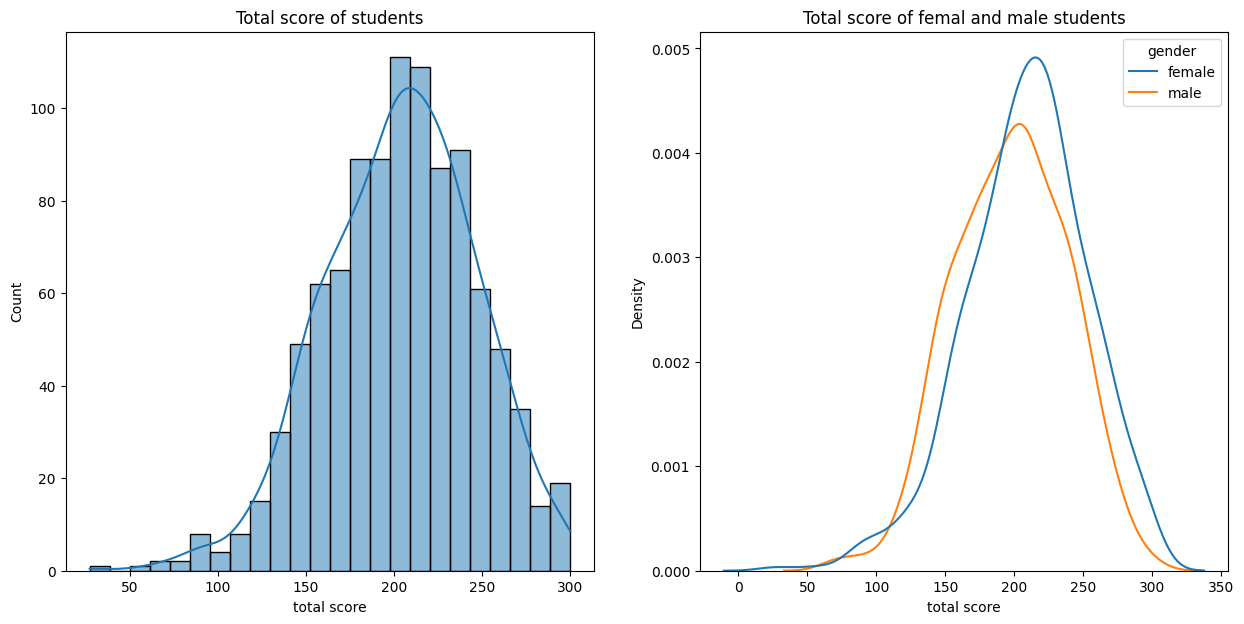

In [29]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data, x= 'total score', kde=True)
plt.title("Total score of students")
plt.subplot(122)
sns.kdeplot(data=data, x= 'total score', hue= 'gender')
plt.title("Total score of femal and male students")

#### Observations:
1. Female students performing better are more compared to male students

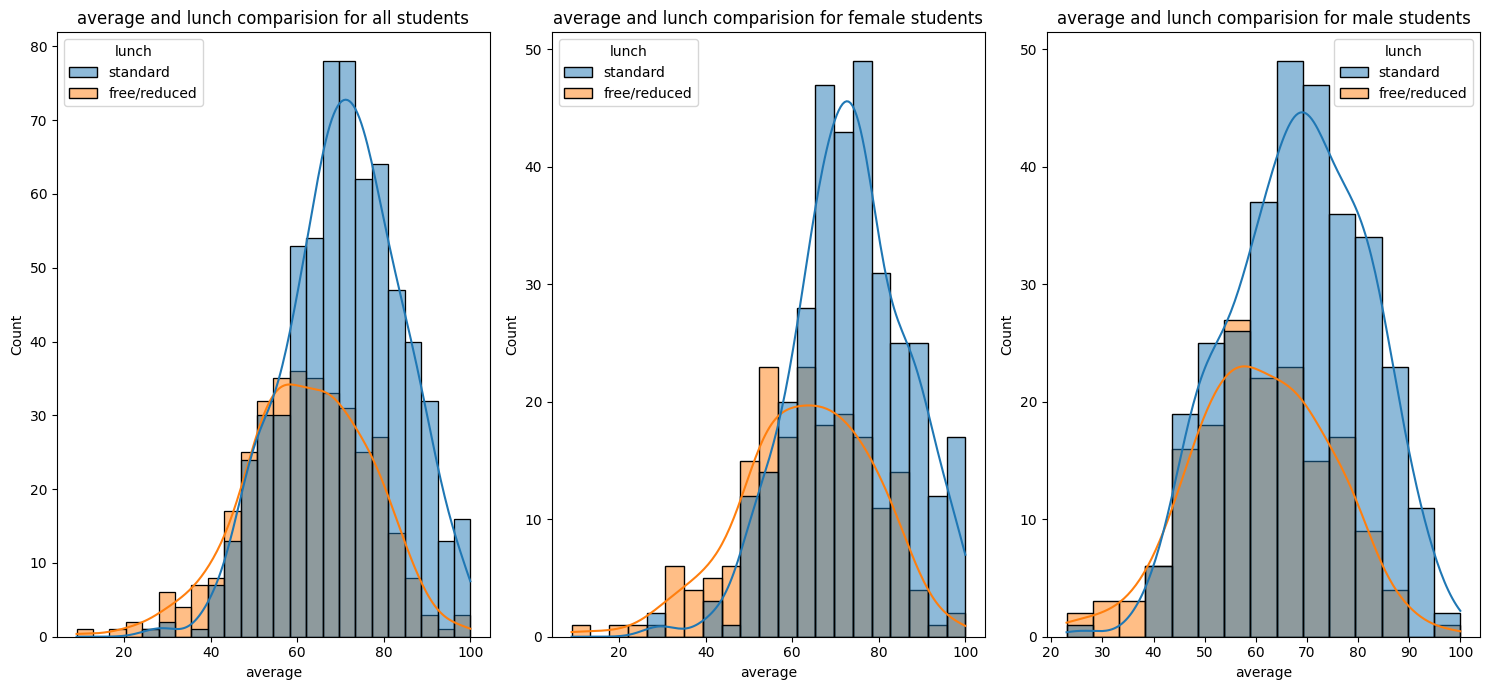

In [30]:
plt.figure(figsize=(15,7))
plt.subplot(131)
sns.histplot(data = data, x = 'average', kde=True, hue='lunch')
plt.title("average and lunch comparision for all students")
plt.subplot(132)
sns.histplot(data= data, x = data[data['gender'] == 'female']['average'], hue= 'lunch', kde=True)
plt.title("average and lunch comparision for female students")
plt.subplot(133)
sns.histplot(data = data, x =data[data['gender'] == 'male']['average'], hue= 'lunch', kde=True)
plt.title("average and lunch comparision for male students")
plt.tight_layout()

#### Observation:
1. Standard lunch help students to perform well, be it male or femal students
2. There is pretty good diference in the graph of lunch. This feature might have very good importance in deciding the average score of students

In [31]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


<Axes: xlabel='average', ylabel='Count'>

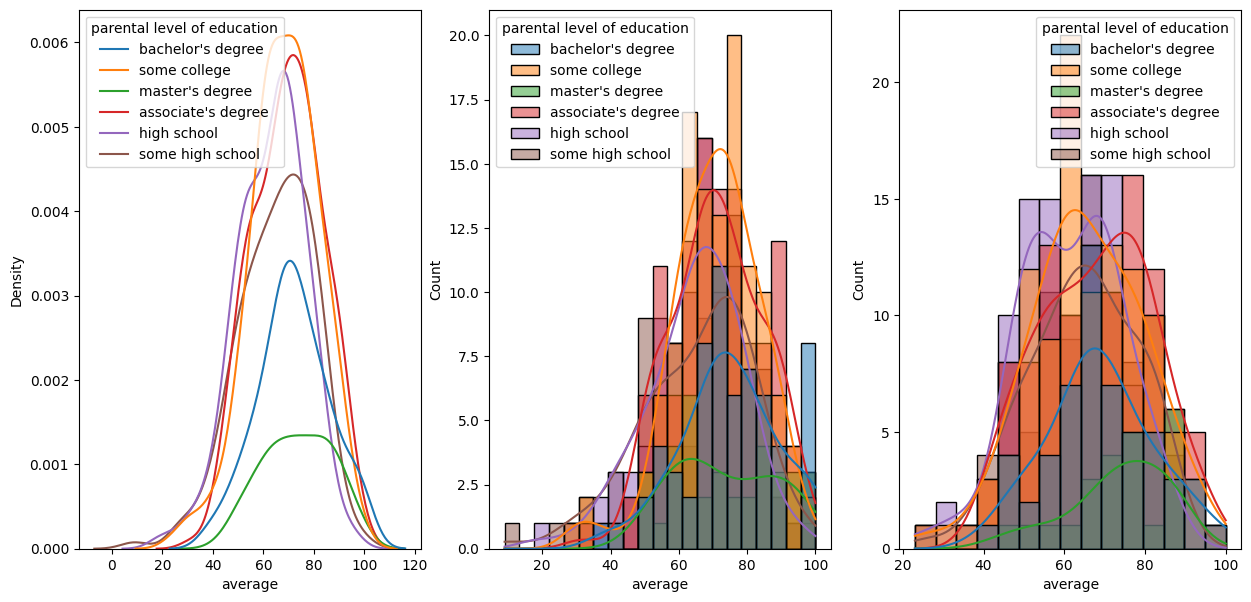

In [32]:
plt.figure(figsize=(15,7))
plt.subplot(131)
sns.kdeplot(data=data, x = 'average', hue= 'parental level of education')
plt.subplot(132)
sns.histplot(data=data, x = data[data['gender'] == 'female']['average'], kde=True, hue='parental level of education')
plt.subplot(133)
sns.histplot(data = data, x = data[data['gender'] == 'male']['average'], kde = True, hue='parental level of education')

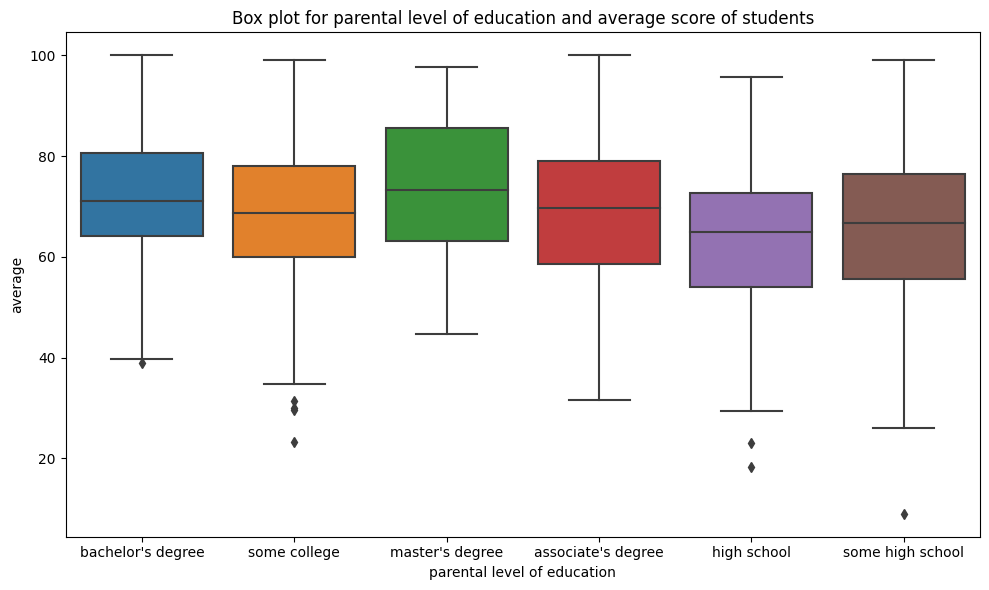

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(data = data, x = 'parental level of education', y = 'average')
plt.title("Box plot for parental level of education and average score of students")
plt.tight_layout()

#### Observation:
1. Parents education doesnot have much impact on the average score of the students

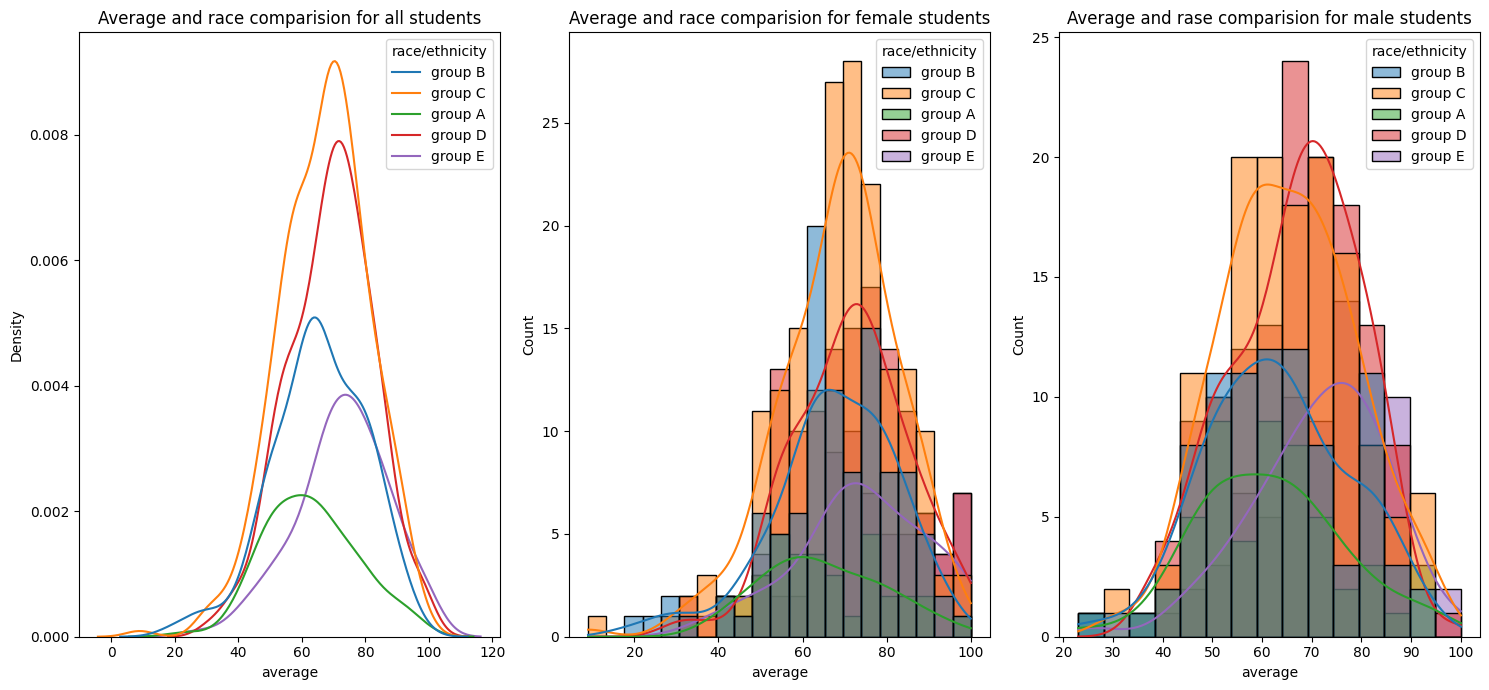

In [34]:
plt.figure(figsize=(15,7))
plt.subplot(131)
sns.kdeplot(data = data, x = 'average', hue='race/ethnicity')
plt.title("Average and race comparision for all students")
plt.subplot(132)
sns.histplot(data=data, x = data[data['gender'] == 'female']['average'], hue='race/ethnicity', kde=True)
plt.title("Average and race comparision for female students")
plt.subplot(133)
sns.histplot(data=data, x = data[data['gender'] == 'male']['average'], hue='race/ethnicity', kde=True)
plt.title("Average and rase comparision for male students")
plt.tight_layout()

<Axes: title={'center': 'average and race comparision for all students'}, xlabel='race/ethnicity', ylabel='average'>

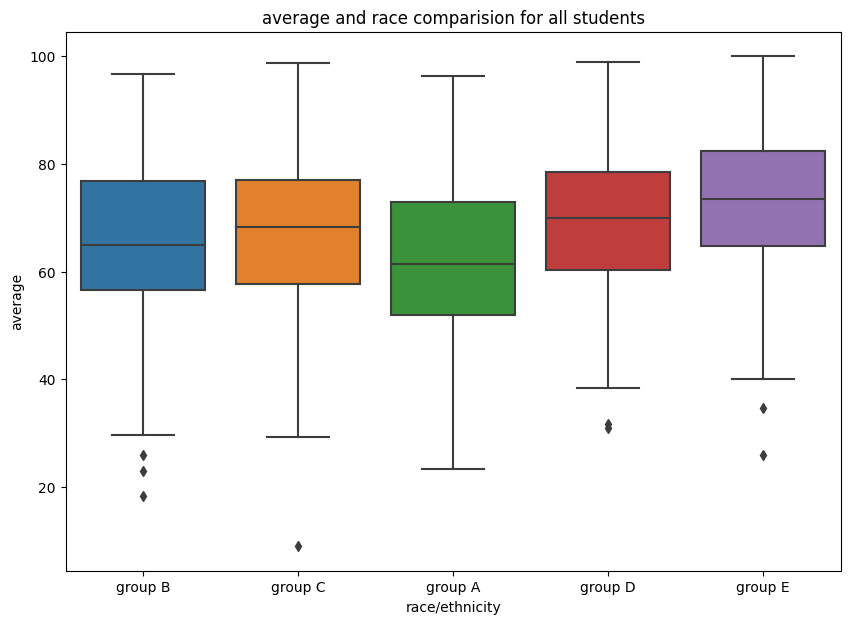

In [35]:
plt.figure(figsize=(10,7))
plt.title("average and race comparision for all students")
sns.boxplot(data=data, x = 'race/ethnicity', y = 'average' )

#### Observation:
1. Race/Ethnicity doest not impact how the students perform
2. Mean value for all the Ethnicity students are closer and lie between 60 and 80
3. Male students with Group A and Group B tends to perform bit lower when compared to other groups

#### Maximum score of students in each subjects

In [36]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


<Axes: title={'center': 'reading score'}, xlabel='reading score'>

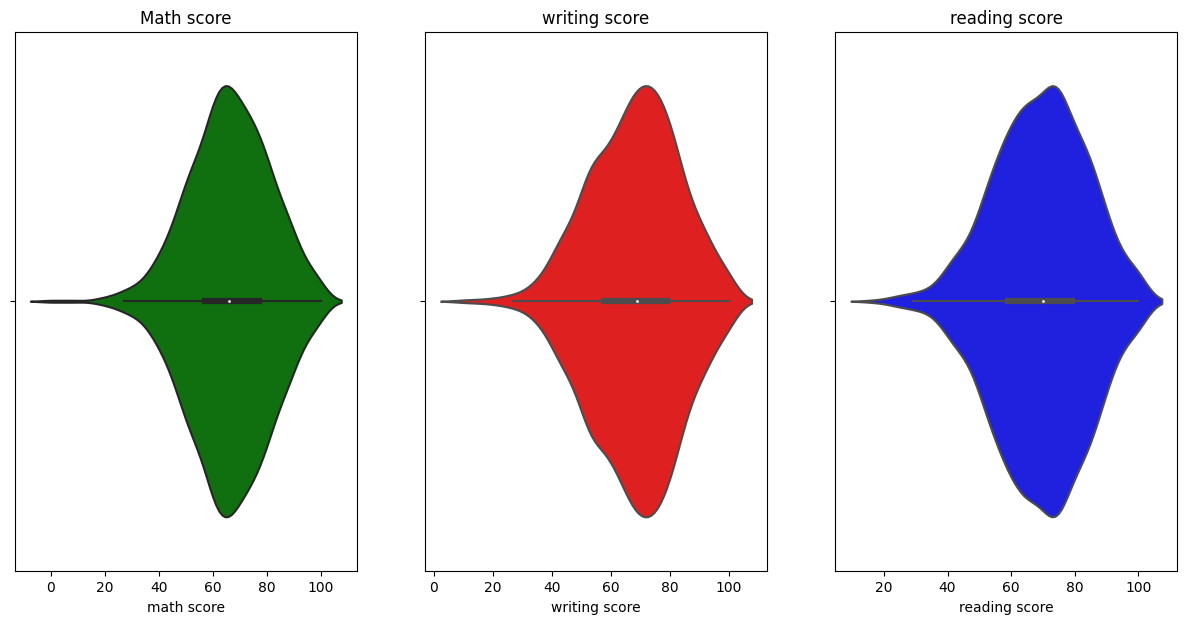

In [37]:
plt.figure(figsize=(15,7))
plt.subplot(131)
plt.title("Math score")
sns.violinplot(data=data, x = 'math score', color='green')
plt.subplot(132)
plt.title("writing score")
sns.violinplot(data= data, x = 'writing score', color = 'red')
plt.subplot(133)
plt.title("reading score")
sns.violinplot(data= data, x= 'reading score', color='blue')

#### Observation:
1. Mean score for all the subjects mostly lie between 60-80

In [38]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


(-1.25, 1.25, -1.25, 1.25)

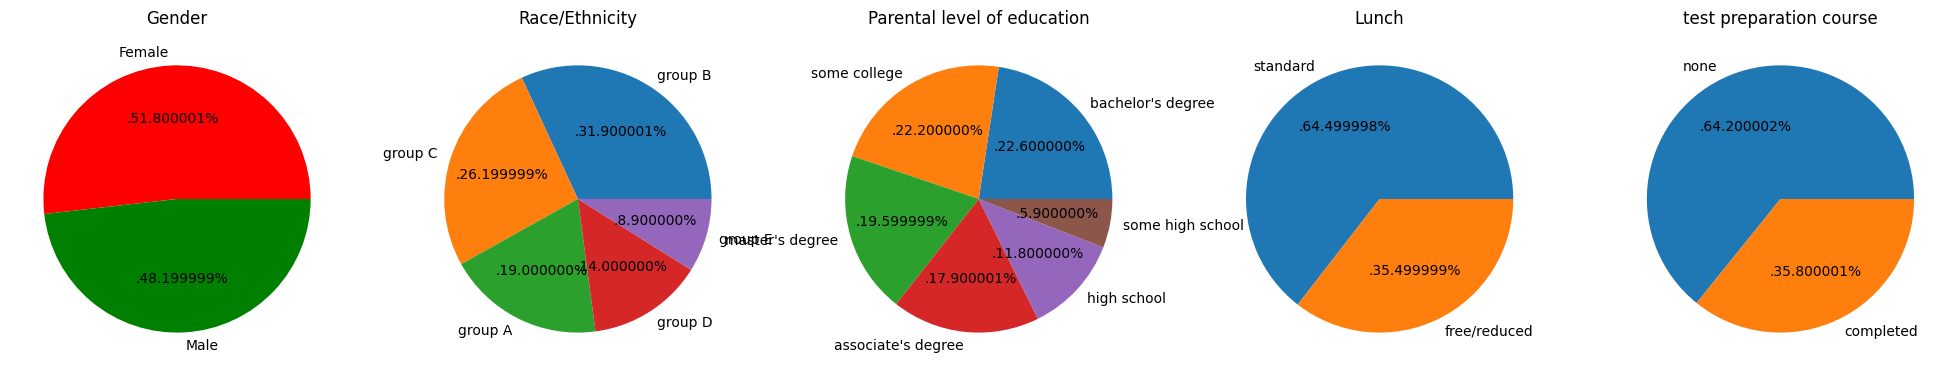

In [39]:
plt.rcParams['figure.figsize'] = (25,5)

#Pie plot for gender feature
plt.subplot(151)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender')
plt.axis('off')

#Pie plot for race feature
plt.subplot(152)
size = data['race/ethnicity'].value_counts()
labels = list(data['race/ethnicity'].unique())
plt.pie(size, labels=labels, autopct=".%2f%%")
plt.title('Race/Ethnicity')
plt.axis('off')

# Pie plot for parental level of education
plt.subplot(153)
size = data['parental level of education'].value_counts()
labels = list(data['parental level of education'].unique())
plt.pie(size, labels=labels, autopct='.%2f%%')
plt.title("Parental level of education")
plt.axis('off')

#Pie plot for lunc feature
plt.subplot(154)
size = data['lunch'].value_counts()
labels = 'standard', 'free/reduced'
plt.pie(size, labels=labels, autopct=".%2f%%")
plt.title("Lunch")
plt.axis('off')

#Pie plot for test preparation course
plt.subplot(155)
size = data['test preparation course'].value_counts()
labels = list(data['test preparation course'].unique())
plt.pie(size, labels=labels, autopct=".%2f%%")
plt.title('test preparation course')
plt.axis('off')


#### Observations:
1. Number of female students and male students are almost same
2. Number of students with Group B Race are more than any other ehtnicity
3. There are lot of students whos parents have atleast some college degree or bachelors degree
4. Lot of students have standard luch
5. Then are lot of students who have no test preparation course

### Multivariate Analysis using Pairplot

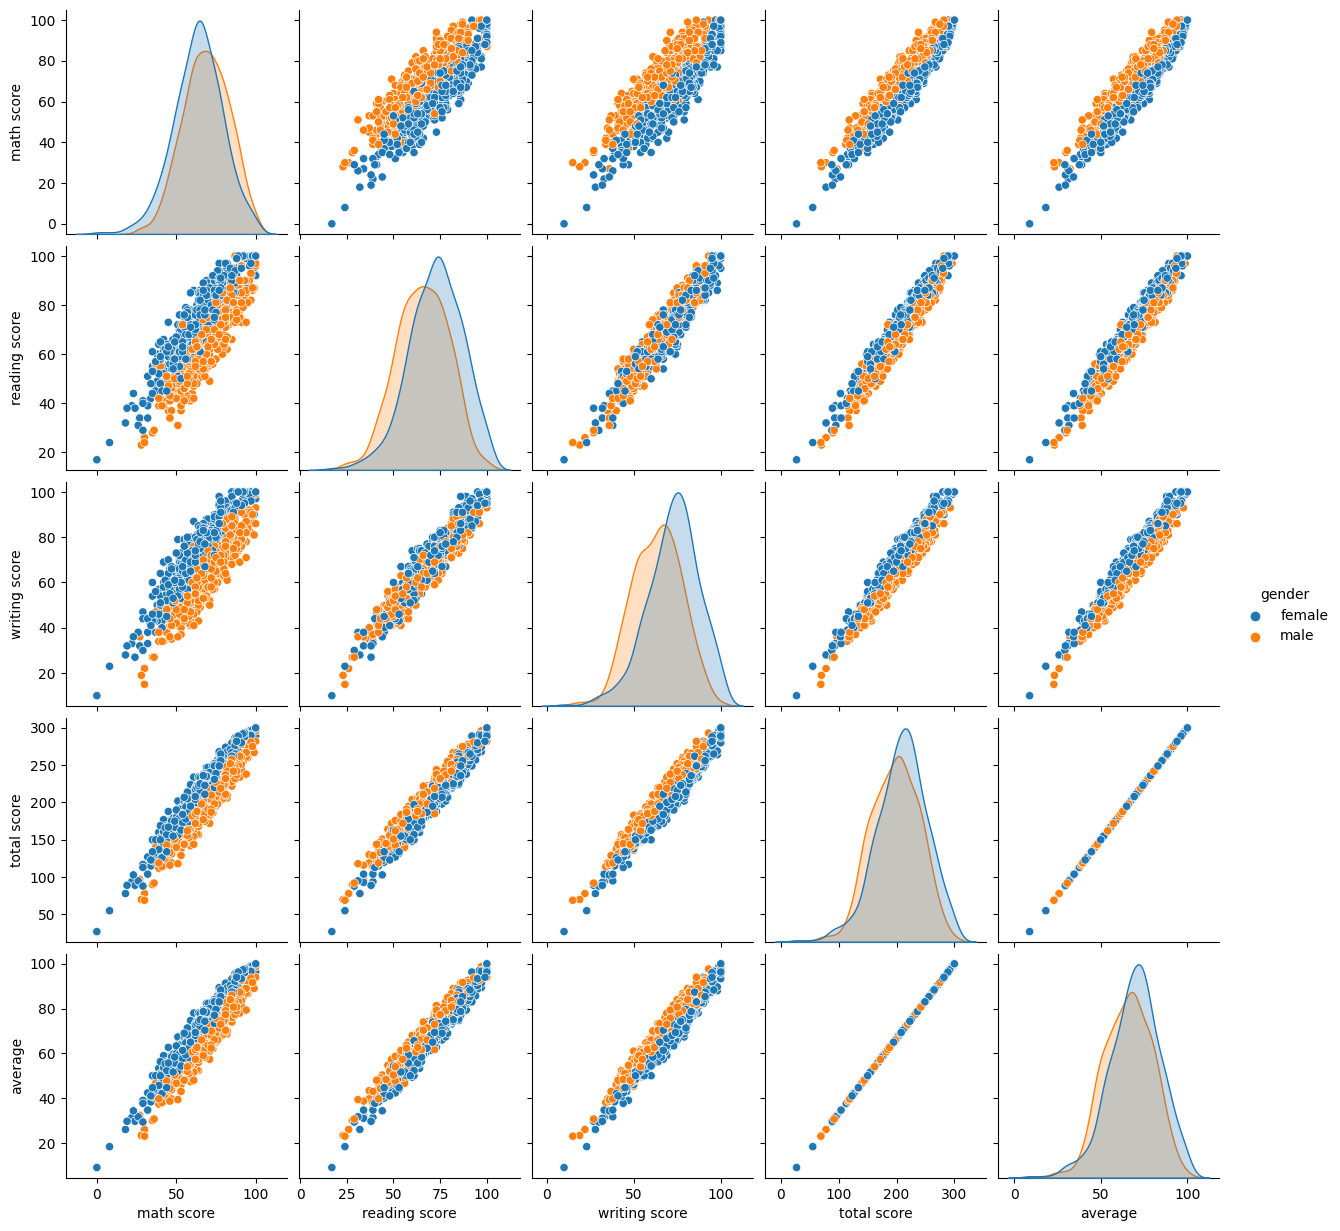

In [40]:
sns.pairplot(data, hue='gender')

#### Observations:
1. From above graph we can see that the reading score and writing score are almost linearly sepearble with math score among female and male students

##Conclusions:

1. Student performance is  related with gender, lunch, parental level of education and race
2. Student performance is not much related with test preparation course
3. Female students tends to perform better than male students